### Script for cleaning and extracting the tale and author from the twits of https://twitter.com/microcuentos

In [1]:
import pandas as pd

Loading tweets saved by the TwitterGrabber script

In [32]:
twitsRaw = pd.read_csv("G:/MicrotalesMachine/microcuentos_tweets1.csv")
twitsRaw.shape

(2496, 3)

In [10]:
twitsRaw.head()

,id,created_at,text
0,733480130794946560,2016-05-20 02:11:05,―¿Parentesco?\n―Tomamos el mismo tren a diario...
1,733119882015977474,2016-05-19 02:19:35,"Era un lobo diferente, en vez de aullarle a la..."
2,732740463782985728,2016-05-18 01:11:54,El patito feo no le dijo a nadie que lo había ...
3,732393424133984256,2016-05-17 02:12:54,Le prometió una vida estable y murió de aburri...
4,731862342611390464,2016-05-15 15:02:34,"Tus miedos los acaricio, no les doy de comer n..."


Some of the tweets contains @mentions and links. We'll remove them

In [25]:
twitsRaw.iloc[53:55]

,id,created_at,text
53,711671323181883392,2016-03-20 21:50:40,@rucodemente https://t.co/R2v54jmt1P
54,711656399378489344,2016-03-20 20:51:22,"Síguenos en @Facebook y entérate de qué van, e..."


In [31]:
print(len(twitsRaw[twitsRaw.text.str.contains('http')]))
print(len(twitsRaw[twitsRaw.text.str.contains('@')]))

71
107


In [34]:
twitsRaw = twitsRaw[~twitsRaw.text.str.contains('http')]
twitsRaw = twitsRaw[~twitsRaw.text.str.contains('@')]

In [35]:
len(twitsRaw)

2355

The tweets contain a tale and an author (in most cases). The author is usually after the last period, although we can see that we'll need to manually review the results

In [36]:
twits = pd.DataFrame()

In [37]:
twits["tale"] = twitsRaw["text"].apply(lambda t: t[:t.rstrip(".").rfind(".")+1])
twits["author"] = twitsRaw["text"].apply(lambda t: t[t.rstrip(".").rfind(".")+1:])

In [38]:
twits.head(10)

,tale,author
0,―¿Parentesco?\n―Tomamos el mismo tren a diario.,\nGustavo Ruiz C.
1,"Era un lobo diferente, en vez de aullarle a la...",José María Pumarino
2,El patito feo no le dijo a nadie que lo había ...,\nJosé Luis Zárate
3,Le prometió una vida estable y murió de aburri...,\nInés Torremocha
4,"Tus miedos los acaricio, no les doy de comer n...",\nCarlos Salem Sola
5,"Tus miedos los acaricio, no les doy de comer n...",\nPatricia Henríquez
6,Y la propia princesa dio muerte al dragón para...,\nAlicia Gómez García.
7,,—¿Me olvidarás?\n—Todos los días\nAntonino De ...
8,Y ambos llegaron puntuales a la cita sin darse...,Ruiz.
9,- ¿ Y tú a qué le temes ? le preguntó\n- A con...,Le contestó\nJosé David Uzcátegui


Let's check the tales' length distribution

In [46]:
twits["lenght"] = twits['tale'].apply(lambda s: len(s))
twits["lenght"].mean()

75.60297239915074

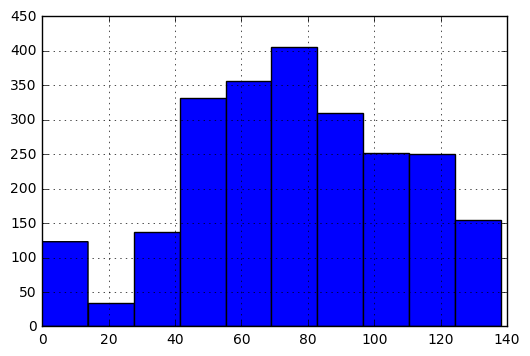

In [41]:
%matplotlib inline
twits["lenght"].hist()

20 characters is probably not enough to write a tale, no matter how 'micro', so this is likely symptomatic of a problem

In [56]:
twits[twits.lenght < 20].head()

,tale,author,lenght
7,,—¿Me olvidarás?\n—Todos los días\nAntonino De ...,0
140,,¿Te apuntarías en un Taller de Microficción On...,0
164,,¿Quién no amaneció alguna vez varias veces en ...,0
165,,"Él tuiteaba y se preguntaba, ¿lo habrá leído?\...",0
267,,Nada tan triste como mi súplica\nTan mediocre ...,0


Here the problem is that the assumption of having a period separating the tale from the author is no always right. We could remove the problematic tweets or fix them manually. I actually opted for the later option, but I'll just ignore them for the rest of this notebook

In [57]:
twits = twits[twits.lenght > 20]

Now we'll check the authors distribution

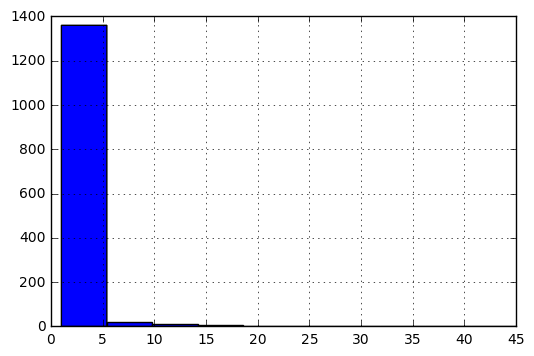

In [61]:
twits.author.value_counts().hist()

Most of the authors have contributed (or were selected with) only one tale, but some are much more prolific:

In [62]:
twits.author.value_counts().head()

 Lenin Pérez Pérez    45
 Mónica Carrillo      38
 Juan Luis            36
 José Luis Zárate     31
 Livia Hernández      17
Name: author, dtype: int64

We'll save the authors information for attribution

In [64]:
twits.author.value_counts().to_csv("G:/MicrotalesMachine/authors.txt", index=True, header=False, encoding='utf-8')

Finally, we'll save the tales as a text file with one row for tale. We'll add a '#' as line terminator because some of the tweets contain end of line characters

In [4]:
twits[['tale']].to_csv("F:/MicrotalesMachine/tweets.txt", index=False, header=False, encoding='utf-8', line_terminator='#\n')